# 1. 이항 분포
* 이항 분포(binomial distribution) : 성공확률이 $\mu$인 베르누이 시도를 $N$번 반복하는 경우 $N$번 중 성공한 횟수를 확률변수 $X$라고 한다면 $X$의 값은 $0 ∼ N$까지의 정수 중 하나를 나타내는 확률변수
$$ X ∼ Bin(x;N, \mu) $$
* 이항 분포 확률변수 $X$의 확률질량함수
    * 우선 베르누이 확률분포를 따르는 확률변수 $Y$ 가정
    $$ Y ∼ Bern(y;\mu) $$
    * 이 확률변수의 $N$개의 표본을 $y_1, y_2, ..., y_N$라고 하면, 이 값은 모두 0(실패) 아니면 1(성공)을 가지기 때문에 $N$번 중 성공한 횟수는 $N$개의 표본 값의 합이다.
    $$ x = \sum_{i=1}^Ny_i $$
    * 베르누이 분포를 따르는 확률변수 $Y$의 확률질량함수를 대입하여 정리하면 이항 분포 확률변수 $X$의 확률질량함수는
    $$ Bin(x;N,\mu) = \begin{pmatrix}N\\ x \end{pmatrix}\mu^x(1 - \mu)^{N - x} $$
        * $\begin{pmatrix} N\\ x \end{pmatrix}$ : 조합(combination)
            * $N$개의 원소 중에 $x$개의 원소를 순서와 상관없이 선택할 수 있는 경우의 수
        * 조합 공식
        $$ \begin{pmatrix} N\\ x \end{pmatrix} = \frac{N!}{x!(N - x)!} $$

# 2. SciPy를 사용한 이항 분포의 시뮬레이션
##### binom 클래스
이항 분포를 구현한다.
* `binom(n, p)`    
    * `n` : 전체 시도 횟수 $N$  
    * `p` : 베르누이 확률 분포의 기댓값 $\mu$

In [11]:
import scipy as sp

N = 10
mu = 0.6
rv = sp.stats.binom(N, mu)

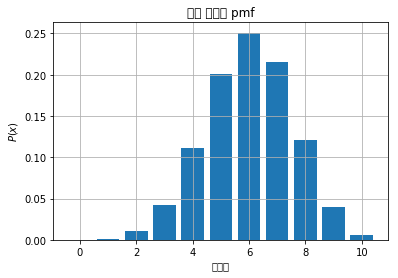

In [16]:
# 확률질량함수
import numpy as np
import matplotlib.pyplot as plt

xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx))
plt.xlabel("표본값")
plt.ylabel("$P(x)$")
plt.title("이항 분포의 pmf")
plt.grid()
plt.show()

In [17]:
# 시뮬레이션
np.random.seed(0)
x = rv.rvs(100)
x

array([ 6,  5,  6,  6,  6,  5,  6,  4,  3,  6,  5,  6,  6,  4,  8,  8,  9,
        5,  5,  4,  3,  5,  6,  5,  8,  5,  8,  4,  6,  6,  7,  5,  6,  6,
        9,  6,  6,  6,  4,  5,  7,  6,  5,  8,  5,  5,  7,  8,  7,  7,  6,
        6,  2,  8,  7,  8,  5,  7,  6,  7,  8,  8,  5,  8,  7,  7,  5,  8,
        4,  8,  3,  6,  3,  6,  5,  9,  7,  8,  7,  8,  7,  6,  8,  5,  6,
        7,  6,  8,  6,  4,  7,  5,  8,  5,  7,  7,  6,  9,  5, 10])

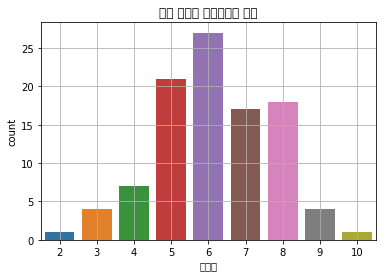

In [20]:
import seaborn as sns

sns.countplot(x)
plt.title("이항 분포의 시뮬레이션 결과")
plt.xlabel("표본값")
plt.grid()
plt.show()

In [28]:
# 이론적인 확률분포와 표본의 확률분포 나타내기
import pandas as pd

y = np.bincount(x, minlength=N+1) / float(len(x))
df = pd.DataFrame({"이론": rv.pmf(xx), "시뮬레이션": y}).stack()
df = df.reset_index()
df.columns = ["표본값", "유형", "비율"]
df.pivot("표본값", "유형", "비율")
df

,표본값,유형,비율
0,0,이론,0.000105
1,0,시뮬레이션,0.000000
2,1,이론,0.001573
3,1,시뮬레이션,0.000000
4,2,이론,0.010617
5,2,시뮬레이션,0.010000
6,3,이론,0.042467
7,3,시뮬레이션,0.040000
8,4,이론,0.111477
9,4,시뮬레이션,0.070000


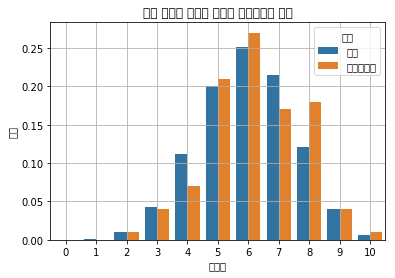

In [29]:
sns.barplot(x="표본값", y="비율", hue="유형", data=df)
plt.title("이항 분포의 이론적 분포와 시뮬레이션 분포")
plt.grid()
plt.show()

# 3. 이항 분포의 모멘트
 ## 3.1. 기댓값
 $$ E[X] = N\mu $$
 > **증명**  
 $$ E[X] = E[\sum_{i=1}^NY_i] = \sum_{i=1}^NE[Y_i] = N\mu $$
 * $Y_i$ : 서로 독립적인 베르누이 분포

 ## 3.2. 분산
 $$ Var[X] = N\mu(1 - \mu) $$
 > **증명**  
 $$ Var[X] = Var[\sum_{i=1}^NY_i] = \sum_{i=1}^NVar[Y_i] = N\mu(1 - \mu) $$

## 연습 문제
이항 확률분포의 모수가 다음과 같을 경우에 각각 표본을 생성한 후 기댓값과 분산을 구하고 앞의 예제와 같이 확률밀도함수와 비교한 바 플롯을 그린다.  
표본의 갯수가 10개인 경우와 1000개인 경우에 대해 각각 위의 계산을 한다.
1. $\mu = 0.5, N = 5$
2. $\mu = 0.9, N = 20$